<a href="https://colab.research.google.com/github/theiaa7/pythexp/blob/main/Semantic_KeywordExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keyword Extraction process in Python with Natural Language Processing(NLP)


# spacY
(NER)

In [ ]:
!pip install spacy
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 1.7 MB/s 
     |████████████████████████████████| 71 kB 4.0 MB/s 
     |████████████████████████████████| 6.0 MB 15.5 MB/s 
     |████████████████████████████████| 13.5 MB 8.1 MB/s 
     |████████████████████████████████| 188 kB 7.7 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Uninstalling spacy-3.3.1:
      Successfully uninstalled spacy-3.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500.6 MB 10 kB/s 
  Created wheel for en-core-sci-lg: filename=en_core_sci_lg-0.2.4-py3-none-any.whl size=501343162 sha256=06da38967bb9ec355cef6508b3055525e4eb1e193512f5f6f1c168be5d28077d
  Stored in directory: /root/.cache/pip/wheels/06/a3/b5/bacce7d280488beaf177c3eadbe9f440244201544a0461f6f3
Successfully built en-core-sci-lg


In [ ]:
import scispacy
import spacy
import en_core_sci_lg

/usr/local/lib/python3.7/dist-packages/spacy/util.py:841: UserWarning: [W094] Model 'en_core_sci_lg' (0.2.4) specifies an under-constrained spaCy version requirement: >=2.2.1. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.2.4,<3.3.0
  warnings.warn(warn_msg)


In [ ]:
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 777.4 MB 6.1 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
text = """spaCy is an open-source software library for advanced natural language processing,
written in the programming languages Python and Cython. The library is published under the MIT license
and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB_Dataset.csv to IMDB_Dataset.csv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.StringIO(uploaded['IMDB_Dataset.csv'].decode('utf-8')))
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
doc = nlp(data.review.iloc[20000])

In [ ]:
doc.ents

(Northern Exposure,
 Northern Exposure,
 New York,
 Marin Frist,
 Joel Fleishman,
 Jack Slattery,
 Maggie O'Connell,
 Ther,
 one,
 one,
 Joshua Brand,
 John Falsey)

In [ ]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

# Yake
(Keyword Extraction)

In [ ]:
!pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 2.9 MB/s 
     |████████████████████████████████| 132 kB 8.7 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73994 sha256=74971bdaa6a982b9933b865e29618e373faa3e3f97495d0c523794845c6a9d68
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [ ]:
import yake

In [ ]:
kw_extractor = yake.KeywordExtractor()

In [ ]:
text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""


In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
sampledoc = data.review.iloc[50]
sampledoc


'Return to the 36th Chamber is one of those classic Kung-Fu movies which Shaw produces back in the 70s and 80s, whose genre is equivalent to the spaghetti westerns of Hollywood, and the protagonist Gordon Liu, the counterpart to the western\'s Clint Eastwood. Digitally remastered and a new print made for the Fantastic Film Fest, this is "Presented in Shaw Scope", just like the good old days.<br /><br />This film is a simple story of good versus evil, told in 3 acts, which more or less sums up the narrative of martial arts films in that era.<br /><br />Act One sets up the premise. Workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by 20% by incoming manchu gangsters. They can\'t do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. At first they had a minor success in getting Liu to impersonate a highly skilled Shaolin monk (one of the best comedy sequences), but their rouse got e

In [ ]:
language = "en"

In [ ]:
max_ngram_size = 1

In [ ]:
deduplication_threshold = 0.1

In [ ]:
numOfKeywords = 20

In [ ]:
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)


In [ ]:
keywords = custom_kw_extractor.extract_keywords(sampledoc)

In [ ]:
for kw in keywords:
  print(kw)

('Shaw', 0.05113071021016382)
('Gordon', 0.05999551583770344)
('Clint', 0.05999551583770344)
('Temple', 0.1587909659193074)
('back', 0.16693048120108733)
('Kung-Fu', 0.19883771772784414)
('films', 0.27945268372910903)


# Rake-Nltk
(Keyword Extraction)

In [ ]:
## Rapid Automatic Keyword Extraction (RAKE)

In [ ]:
!pip install rake_nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from rake_nltk import Rake

In [ ]:
rake_nltk_var = Rake()

In [ ]:
text = """spaCy is an open-source software library for advanced natural language processing,
written in the programming languages Python and Cython. The library is published under the MIT license
and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""


In [ ]:
sampledoc



'Return to the 36th Chamber is one of those classic Kung-Fu movies which Shaw produces back in the 70s and 80s, whose genre is equivalent to the spaghetti westerns of Hollywood, and the protagonist Gordon Liu, the counterpart to the western\'s Clint Eastwood. Digitally remastered and a new print made for the Fantastic Film Fest, this is "Presented in Shaw Scope", just like the good old days.<br /><br />This film is a simple story of good versus evil, told in 3 acts, which more or less sums up the narrative of martial arts films in that era.<br /><br />Act One sets up the premise. Workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by 20% by incoming manchu gangsters. They can\'t do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. At first they had a minor success in getting Liu to impersonate a highly skilled Shaolin monk (one of the best comedy sequences), but their rouse got e

In [ ]:
rake_nltk_var.extract_keywords_from_text(sampledoc)

In [ ]:
keyword_extracted = rake_nltk_var.get_ranked_phrases()[:5]

In [ ]:
keyword_extracted

['many times .< br />< br /> act two shows',
 'unorthodox way .< br />< br /> act three',
 'era .< br />< br /> act one sets',
 'good old days .< br />< br />',
 'best comedy sequences ),']

In [ ]:
for kw in keyword_extracted:
  print(kw)

many times .< br />< br /> act two shows
unorthodox way .< br />< br /> act three
era .< br />< br /> act one sets
good old days .< br />< br />
best comedy sequences ),


# Gensim
(Keyword Extraction)

In [ ]:
import gensim

In [ ]:
from gensim.summarization import keywords

In [ ]:
text = """spaCy is an open-source software library for advanced natural language processing,
written in the programming languages Python and Cython. The library is published under the MIT license
and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""


In [ ]:
sampledoc

'Return to the 36th Chamber is one of those classic Kung-Fu movies which Shaw produces back in the 70s and 80s, whose genre is equivalent to the spaghetti westerns of Hollywood, and the protagonist Gordon Liu, the counterpart to the western\'s Clint Eastwood. Digitally remastered and a new print made for the Fantastic Film Fest, this is "Presented in Shaw Scope", just like the good old days.<br /><br />This film is a simple story of good versus evil, told in 3 acts, which more or less sums up the narrative of martial arts films in that era.<br /><br />Act One sets up the premise. Workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by 20% by incoming manchu gangsters. They can\'t do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. At first they had a minor success in getting Liu to impersonate a highly skilled Shaolin monk (one of the best comedy sequences), but their rouse got e

In [ ]:
print(keywords(sampledoc))

getting
gets
angled
angles
good
shaolin
skilled
impact
manchu
sound
comedy
got
non
shaw
fest
martial arts films
film
builds
strength
digitally
eastwood
evil
protagonist


World Cloud

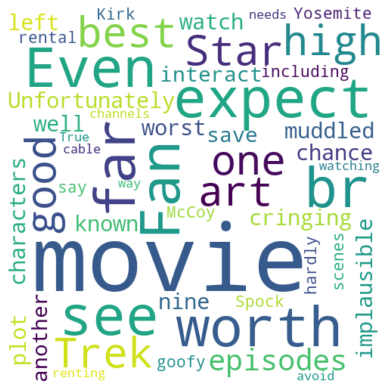

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#text = sampledoc
text = data.review.iloc[49999]

wc = WordCloud(width=500, height=500, background_color="white").generate(text)

# display the generated image:
my_dpi = 72
plt.figure(figsize = (500/my_dpi, 500/my_dpi), dpi=my_dpi)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()